Life expectancy Prediction

# **Import Libraries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Read Data

In [22]:
df = pd.read_csv(r"path\Life Expectancy Data.csv")

### Details

In [23]:
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [56]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.550179,738.251295,78.528421,2419.592240,38.29869,42.035739,82.474643,5.940643,82.246086,1.742103,7434.749690,1.227954e+07,4.882301,4.920439,0.634369,12.075170
std,4.613841,9.510819,124.226596,117.926501,3.994827,1987.914858,25.183772,11467.272489,19.99140,160.445548,23.420689,2.445735,23.705664,5.077785,13411.023325,5.471776e+07,4.433359,4.532488,0.209603,3.342988
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.534093e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.702500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.755000,93.000000,0.100000,2192.681084,1.574070e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7188.875869,8.207892e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [26]:
df.shape

(2938, 22)

# **Exploratory Data Analysis and Feature Engineering**

Check for number of NULL values within each column as s percentage of the entire shape of the dataframe.

In [27]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [28]:
# Percentage of NULL values
100*df.isnull().sum()/df.shape[0]

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

**Working with missing data.**

Use the pandas dataframe.interpolate() function to fill NA values in the dataframe since we are dealing with time series data over a period of successive years.

In [29]:
for col in df.columns:
  df[col] = df[col].interpolate(method='linear',limit_direction='both')

In [30]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Detecting & Filtering Outliers.**

Identify outliers using the Interquartile Range (IQR), a statistical measure of data spread calculated as the difference between the 75th and 25th percentiles (Q3 and Q1). The IQR determines the middle 50% of the dataset and helps to detect values that fall significantly beyond this range.

In [31]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

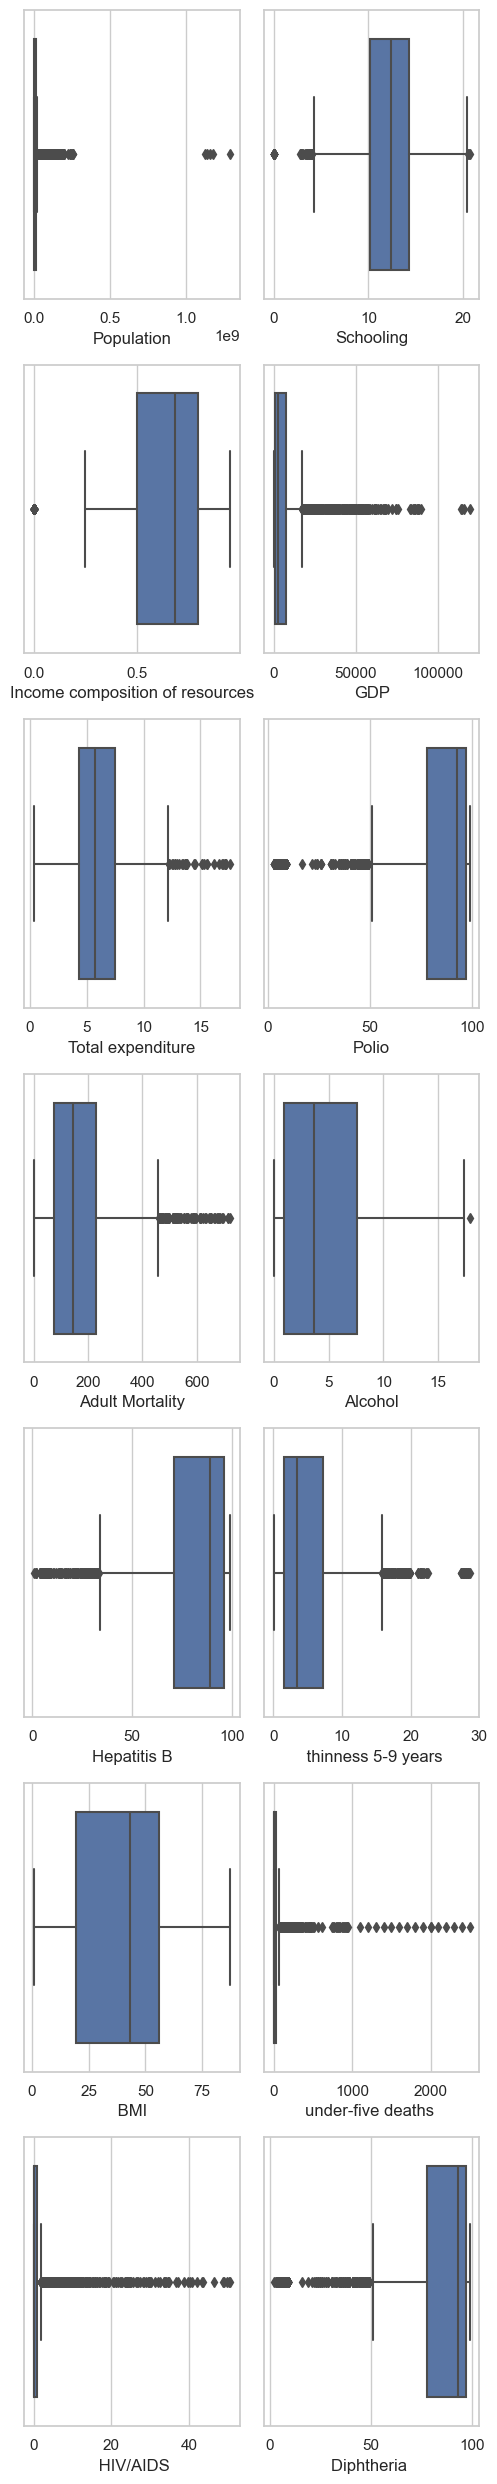

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns 
columns = [
    'Population', 'Schooling', 'Income composition of resources', 'GDP',
    'Total expenditure', 'Polio', 'Adult Mortality', 'Alcohol',
    'Hepatitis B', ' thinness 5-9 years', ' BMI ', 'under-five deaths ',
    ' HIV/AIDS', 'Diphtheria '
]

fig, axes = plt.subplots(7, 2, figsize=(5, 25))


for ax, column in zip(axes.flatten(), columns):
    sns.boxplot(x=df[column], ax=ax)
plt.tight_layout()
plt.show()


In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                               8.000000e+00
Life expectancy                    1.250000e+01
Adult Mortality                    1.540000e+02
infant deaths                      2.200000e+01
Alcohol                            6.647500e+00
percentage expenditure             4.368488e+02
Hepatitis B                        2.500000e+01
Measles                            3.602500e+02
 BMI                               3.677500e+01
under-five deaths                  2.800000e+01
Polio                              1.900000e+01
Total expenditure                  3.127500e+00
Diphtheria                         1.900000e+01
 HIV/AIDS                          7.000000e-01
GDP                                6.635257e+03
Population                         7.954483e+06
 thinness  1-19 years              5.600000e+00
 thinness 5-9 years                5.700000e+00
Income composition of resources    2.911071e-01
Schooling                          4.100000e+00
dtype: float64


In [34]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\miles\AppData\Local\Temp\ipykernel_26156\1324637163.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
df_clean.shape

(1117, 22)

**Insights**

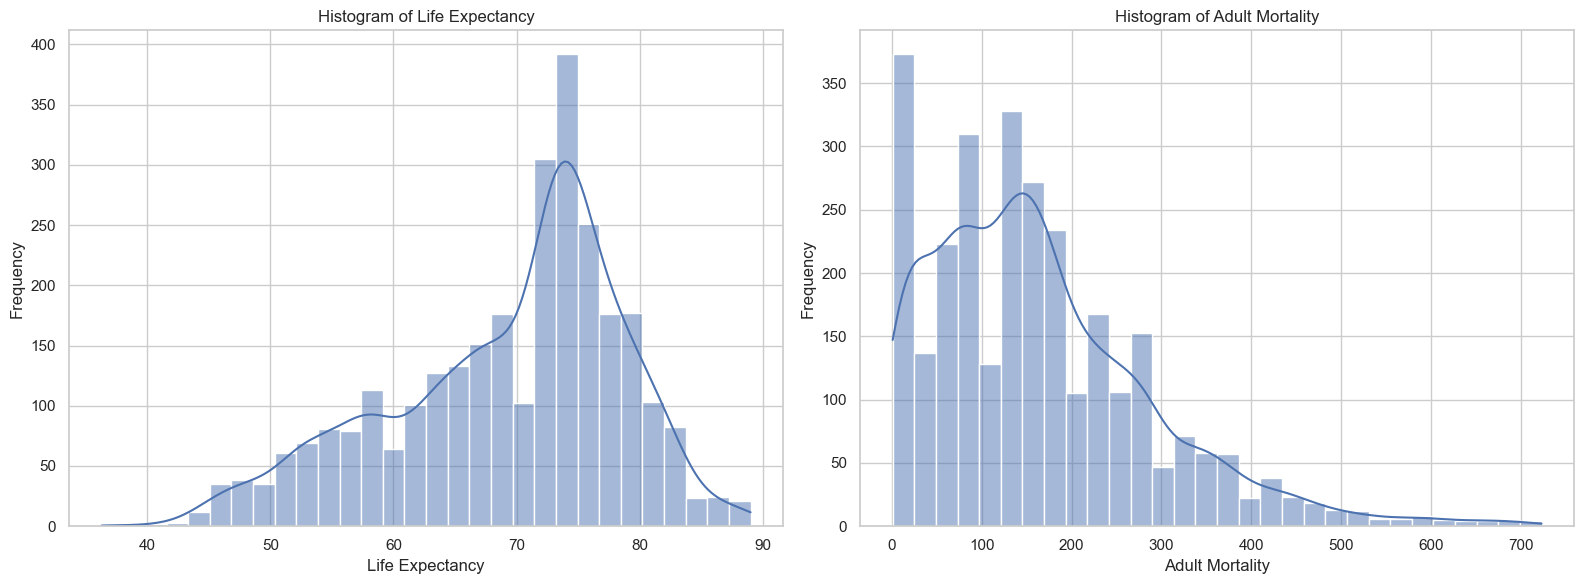

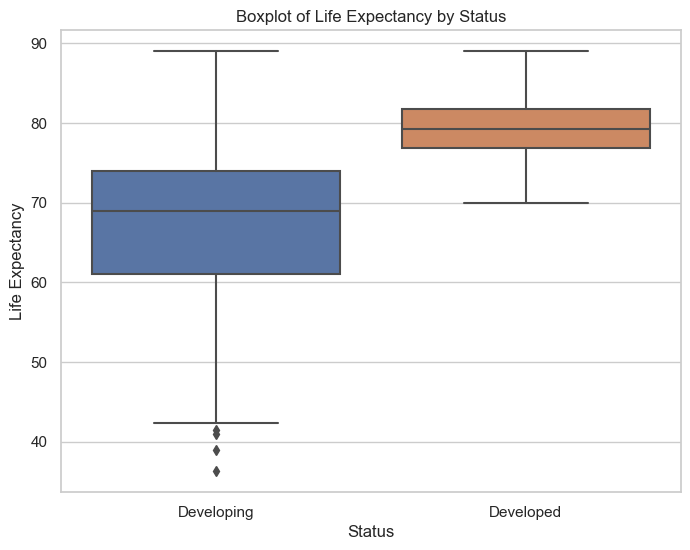

In [64]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting histograms for the 'Life expectancy' and 'Adult Mortality'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Life expectancy histogram
sns.histplot(df['Life expectancy '].dropna(), bins=30, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Life Expectancy')
ax[0].set_xlabel('Life Expectancy')
ax[0].set_ylabel('Frequency')

# Adult Mortality histogram
sns.histplot(df['Adult Mortality'].dropna(), bins=30, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Adult Mortality')
ax[1].set_xlabel('Adult Mortality')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting a boxplot for 'Life expectancy'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='Life expectancy ')
plt.title('Boxplot of Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

In [36]:
df_clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.046186,-0.026471,0.062363,-0.136004,-0.041569,0.153244,0.032863,-0.015976,0.071424,-0.030733,0.036035,0.022674,0.003294,0.058686,0.001704,0.025769,0.035145,0.012818,0.068773
Life expectancy,0.046186,1.000000,-0.564329,-0.333388,0.406726,0.324035,0.154186,-0.113293,0.386781,-0.376161,0.346108,0.274791,0.357826,-0.484477,0.151110,0.016706,-0.390887,-0.389912,0.805275,0.681330
Adult Mortality,-0.026471,-0.564329,1.000000,0.230186,-0.105939,-0.197141,-0.144125,0.081875,-0.255414,0.246407,-0.190374,-0.145796,-0.192808,0.331473,-0.043454,0.002054,0.166043,0.169304,-0.438029,-0.355802
infant deaths,0.062363,-0.333388,0.230186,1.000000,-0.273842,-0.135409,-0.122990,0.304604,-0.165646,0.990827,-0.194155,-0.078475,-0.197169,0.160815,-0.100949,0.196528,0.230328,0.224847,-0.370746,-0.342771
Alcohol,-0.136004,0.406726,-0.105939,-0.273842,1.000000,0.158691,0.117749,-0.111140,0.245870,-0.280712,0.262291,0.300141,0.270393,-0.190044,0.269904,0.008718,-0.392228,-0.385471,0.546137,0.488217
percentage expenditure,-0.041569,0.324035,-0.197141,-0.135409,0.158691,1.000000,0.063083,-0.046848,0.176364,-0.149709,0.099510,0.120599,0.122829,-0.153798,0.276896,0.047876,-0.154892,-0.160608,0.294088,0.294369
Hepatitis B,0.153244,0.154186,-0.144125,-0.122990,0.117749,0.063083,1.000000,-0.086199,0.093393,-0.138650,0.579782,0.087311,0.618393,-0.185202,0.099585,0.046312,-0.022081,-0.026047,0.205560,0.189146
Measles,0.032863,-0.113293,0.081875,0.304604,-0.111140,-0.046848,-0.086199,1.000000,-0.085606,0.309308,-0.076544,-0.103122,-0.064787,0.057060,-0.030443,0.082037,0.196054,0.192717,-0.085280,-0.086419
BMI,-0.015976,0.386781,-0.255414,-0.165646,0.245870,0.176364,0.093393,-0.085606,1.000000,-0.197933,0.122247,0.177492,0.131703,-0.288259,0.133144,0.074976,-0.511788,-0.517439,0.433088,0.389796
under-five deaths,0.071424,-0.376161,0.246407,0.990827,-0.280712,-0.149709,-0.138650,0.309308,-0.197933,1.000000,-0.217930,-0.084952,-0.219652,0.206854,-0.114807,0.192571,0.258271,0.249987,-0.412359,-0.375279


<AxesSubplot:>

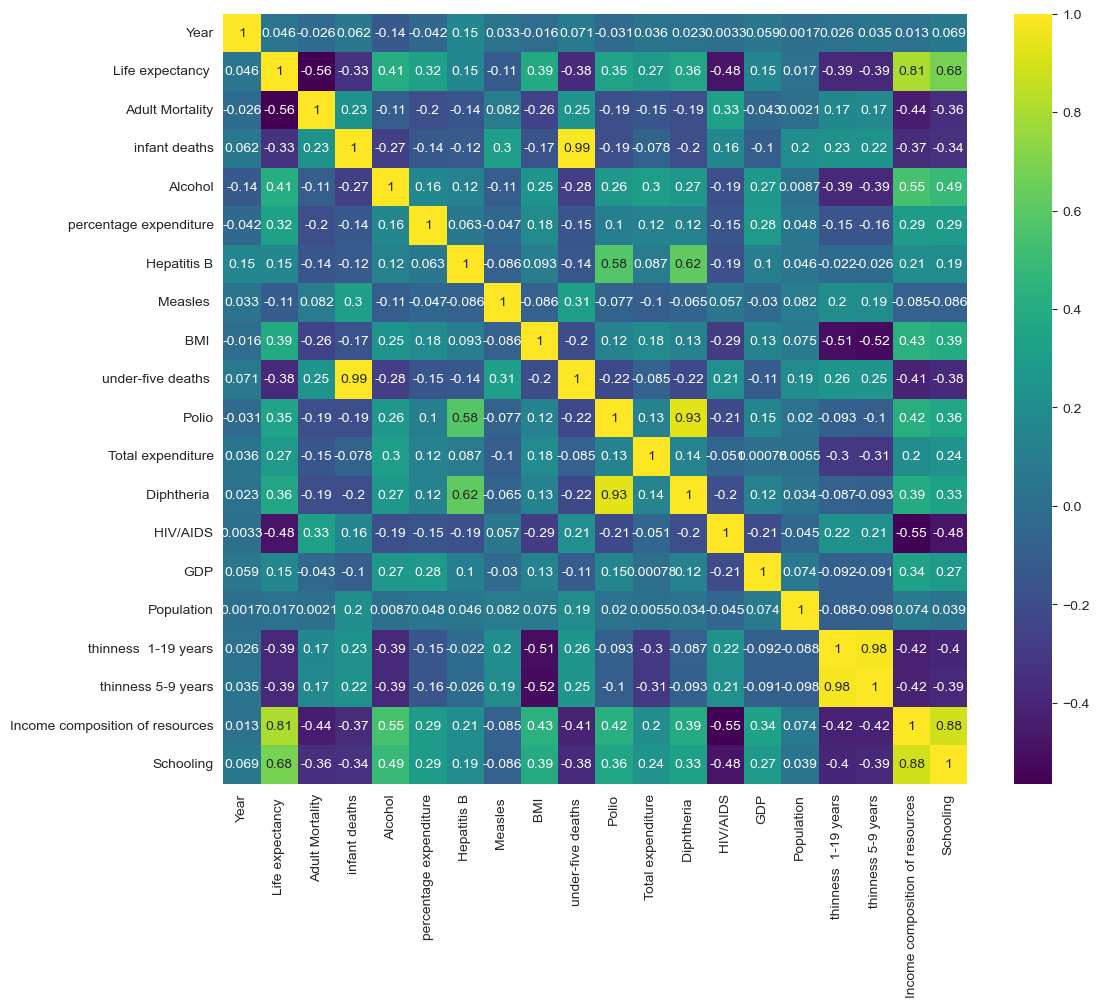

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(),cmap='viridis',annot=True)

In [39]:
df_clean.corr()['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Income composition of resources    0.805275
Schooling                          0.681330
Alcohol                            0.406726
 BMI                               0.386781
Diphtheria                         0.357826
Polio                              0.346108
percentage expenditure             0.324035
Total expenditure                  0.274791
Hepatitis B                        0.154186
GDP                                0.151110
Year                               0.046186
Population                         0.016706
Measles                           -0.113293
infant deaths                     -0.333388
under-five deaths                 -0.376161
 thinness 5-9 years               -0.389912
 thinness  1-19 years             -0.390887
 HIV/AIDS                         -0.484477
Adult Mortality                   -0.564329
Name: Life expectancy , dtype: float64

<AxesSubplot:>

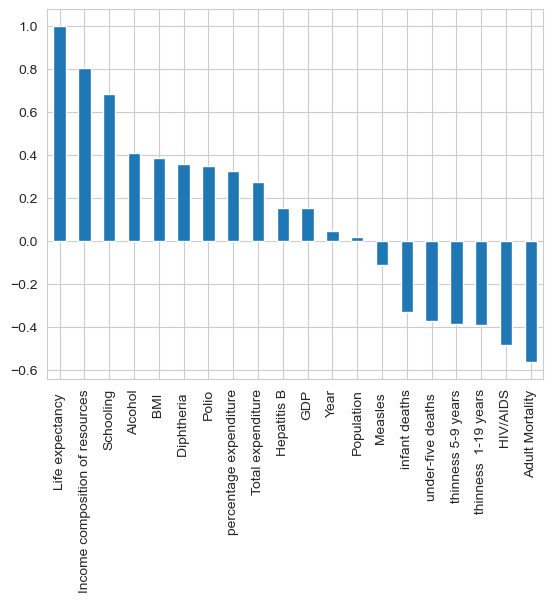

In [40]:
df_clean.corr()['Life expectancy '].sort_values(ascending=False).plot(kind='bar')

The chief predicting factors that seem to affect life expectancy are the Income composition of resorses, Schooling, Alcohol, BMI, Diphtheria, Polio, percentage expenditure, total expenditure,Hepatitis B, GDP.

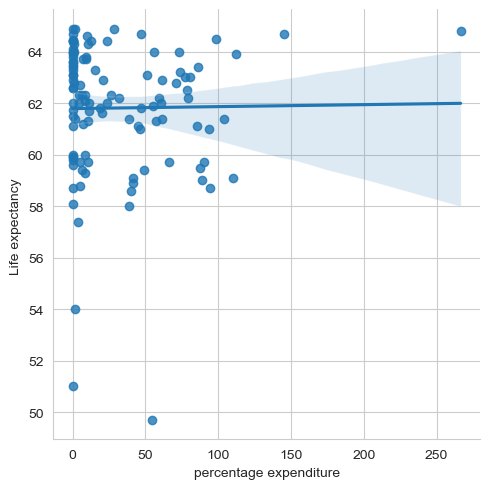

In [41]:
less_than_65 = df_clean[df_clean['Life expectancy '] < 65]
sns.lmplot(x='percentage expenditure',y='Life expectancy ',data=less_than_65)

Total expenditure and percentage are weakly correlated to the life expenctancy, beyond a certain threshold, an increase in expenditure does not transalte to an increase in life expenditure. Other socio-economic factors need to be improved which are strongly correlated to the life expectany.

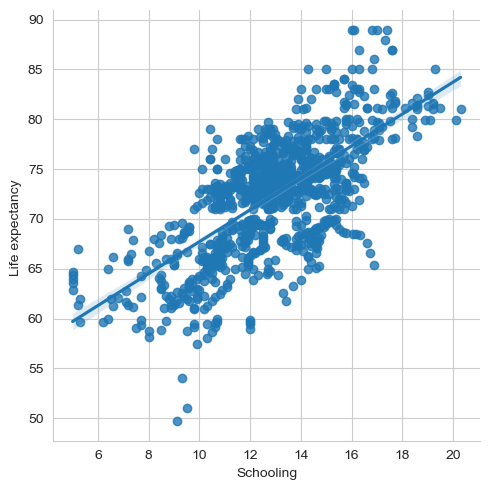

In [42]:
sns.lmplot(x='Schooling',y='Life expectancy ',data=df_clean)

Schooling is shown to have a fairly strong relationship with life expectancy, as expected, education raises awareness in making conscious life choices on habits such as dietary, drug and substance abuse etc.

In [43]:
df_clean['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [44]:
dmap = {'Developed':1,'Developing':0}
df_clean['Status'] = df_clean['Status'].map(dmap)

C:\Users\miles\AppData\Local\Temp\ipykernel_26156\666373535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Status'] = df_clean['Status'].map(dmap)


In [45]:
df_clean.head(4)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,0,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,0,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,0,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,0,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2


# **Training and Testing Data**

In [46]:
y = df_clean['Life expectancy '].values
X = df_clean.drop(['Country','Life expectancy '],axis=1).values # Too many countries to create dummy variables on

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Training the Model**

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficient and intercept of the model.**

In [51]:
print('Coefficients:\n',lm.coef_)
print('\n')
print('Intercept:\n',lm.intercept_)

Coefficients:
 [ 9.68200877e-02  1.73240100e+00 -1.51666537e-02  4.45077893e-01
 -4.74410836e-02  2.23099303e-03 -2.06663925e-02 -3.03579630e-04
 -7.88881802e-03 -3.59824323e-01 -8.52983692e-02  2.26061096e-01
  1.12339860e-01 -3.22109761e-01 -1.77396480e-04 -4.51430376e-08
  1.14833894e-01 -1.75510244e-01  3.54208222e+01 -3.90343760e-01]


Intercept:
 -140.78826783632292


# **Predicting Test Data**

In [52]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

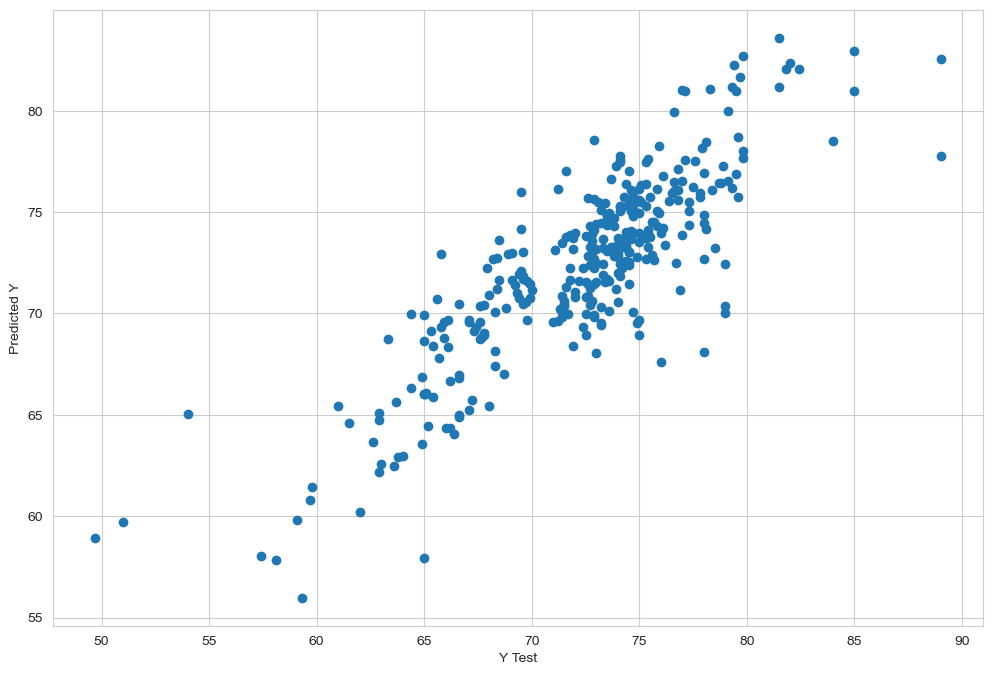

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **Evaluating the Model**

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1211122772732556
MSE: 7.9057453550425
RMSE: 2.811715731549422


# **Residuals**

In [63]:
#sns.distplot((y_test-predictions),bins=50);